In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras


In [27]:
df = pd.read_csv("Datamerge.csv",sep=";")
df

,U,I,N,Duty,Dir,Delta N,Mass
0,2406,24,137,2774,1,274,240
1,2406,25,137,2680,1,0,240
2,2406,24,216,2822,1,158,240
3,2406,24,216,2846,1,0,240
4,2406,24,205,2837,1,-22,240
...,...,...,...,...,...,...,...
2661,2412,11,485,258,0,0,670
2662,2412,11,485,244,0,0,670
2663,2412,12,485,230,0,0,670
2664,2412,12,488,222,0,6,670


<AxesSubplot:>

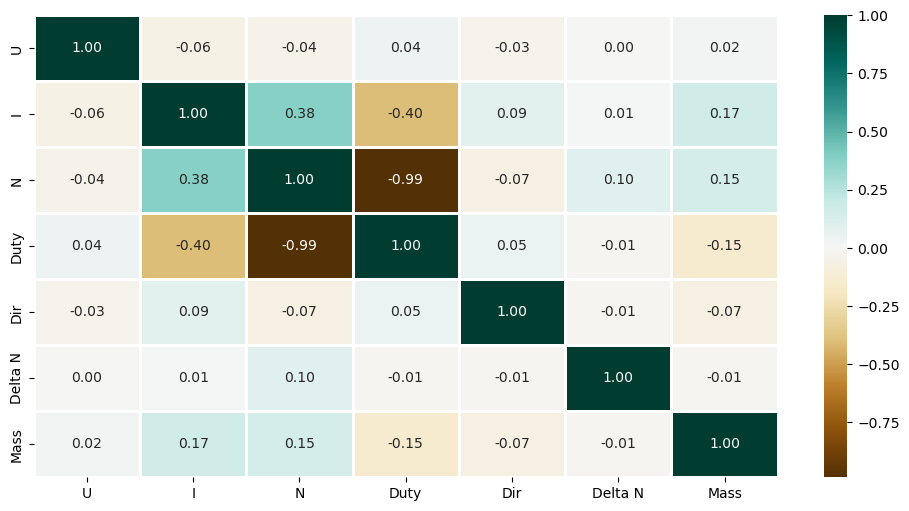

In [28]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 1 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   U;I;N;Duty;Dir;Delta N;Mass  2666 non-null   object
dtypes: object(1)
memory usage: 21.0+ KB


In [88]:
X = df.drop(columns=['Mass'])
print(X)
# X = X.drop(X.columns[0],axis=1)
Y = df[['Mass']]
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val=train_test_split(X,Y,train_size=0.4, test_size=0.6, random_state=0)
X_train2, X_val, Y_train2, Y_val=train_test_split(X_val,Y_val,train_size=0.65, test_size=0.35, random_state=0)
X_val, X_test, Y_val, Y_test=train_test_split(X_val,Y_val,train_size=0.5, test_size=0.5, random_state=0)
print(X_train.shape,X_train2.shape, X_val.shape, X_test.shape, Y_train.shape,Y_train2.shape, Y_val.shape, Y_test.shape)

         U   I    N  Duty  Dir  Delta N
0     2406  24  137  2774    1      274
1     2406  25  137  2680    1        0
2     2406  24  216  2822    1      158
3     2406  24  216  2846    1        0
4     2406  24  205  2837    1      -22
...    ...  ..  ...   ...  ...      ...
2661  2412  11  485   258    0        0
2662  2412  11  485   244    0        0
2663  2412  12  485   230    0        0
2664  2412  12  488   222    0        6
2665  2412  11  493   209    0       10

[2666 rows x 6 columns]
(1066, 6) (1040, 6) (280, 6) (280, 6) (1066, 1) (1040, 1) (280, 1) (280, 1)


In [30]:
Y_train

,Mass
1127,470
286,240
2296,670
40,240
1901,670
...,...
1731,470
763,240
835,240
1653,470


In [31]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
 
model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_val)
print(mean_absolute_percentage_error(Y_val, Y_pred))

c:\Users\Tu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.452988527005432


In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_val)
 
mean_absolute_percentage_error(Y_val, Y_pred)

C:\Users\Tu\AppData\Local\Temp\ipykernel_29972\2335791258.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RFR.fit(X_train, Y_train)


0.030897432888625516

In [75]:
Y_pred = model_RFR.predict(X_test[21:30])
Y_pred,Y_test[21:30]

(array([650., 240., 550., 240., 240., 650., 670., 670., 670.]),
       Mass
 2030   670
 817    240
 1721   470
 619    240
 708    240
 2476   670
 2043   670
 2626   670
 1997   670)

In [90]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(128, activation='sigmoid', input_shape=(6,)))
model.add(keras.layers.Dense(64, activation='sigmoid'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(128, activation='sigmoid'))
model.add(keras.layers.Dense(64, activation='sigmoid'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [91]:
model.fit(X_train, Y_train,validation_split=0.2, epochs=80)

Epoch 1/80
27/27 [==============================] - 2s 14ms/step - loss: 223696.2812 - mae: 439.7579 - val_loss: 247872.4688 - val_mae: 464.5476
Epoch 2/80
27/27 [==============================] - 0s 4ms/step - loss: 218394.0781 - mae: 433.6706 - val_loss: 240087.9844 - val_mae: 456.0919
Epoch 3/80
27/27 [==============================] - 0s 4ms/step - loss: 208821.5156 - mae: 422.4370 - val_loss: 227210.3125 - val_mae: 441.7490
Epoch 4/80
27/27 [==============================] - 0s 4ms/step - loss: 193947.3594 - mae: 404.3959 - val_loss: 207890.7500 - val_mae: 419.3121
Epoch 5/80
27/27 [==============================] - 0s 5ms/step - loss: 172812.8750 - mae: 377.3556 - val_loss: 181073.0469 - val_mae: 386.0115
Epoch 6/80
27/27 [==============================] - 0s 4ms/step - loss: 144342.2188 - mae: 336.8655 - val_loss: 146174.4375 - val_mae: 337.7963
Epoch 7/80
27/27 [==============================] - 0s 5ms/step - loss: 110094.0938 - mae: 282.2323 - val_loss: 108244.0000 - val_mae: 

In [161]:

y_predict=model.predict(X_train2, batch_size=1)
y_predict = np.concatenate(y_predict)
# y_pre = np.concatenate((label,y_predict),axis=0)
# y_predict = pd.Series(y_predict)
# X_train2.to_csv("X_train2.csv")
# y_predict.to_csv("y_predict.csv")

1040/1040 [==============================] - 2s 2ms/step


In [196]:
X_val.to_csv("X_val.csv")
y_val=model.predict(X_val, batch_size=1)
y_val = np.concatenate(y_val)
# y_pre = np.concatenate((label,y_predict),axis=0)
y_val = pd.Series(y_val)
y_val.to_csv("y_test.csv")

280/280 [==============================] - 1s 2ms/step


In [162]:
y_predict

0       440.067444
1       440.067444
2       440.067383
3       440.067444
4       440.067200
           ...    
1035    440.067322
1036    440.067444
1037    440.067322
1038    440.067383
1039    440.067383
Length: 1040, dtype: float32

In [194]:
X_train3=pd.read_csv('dass.csv',sep=";")
print(type(X_train3["Predict"][0].split()[0]))
X_train3["Predict"]=X_train3["Predict"].apply(lambda x: float(x.split()[0].replace(',', '.')))
X_train3["Predict"]

<class 'str'>


0       440.06744
1       440.06744
2       440.06738
3       440.06744
4       440.06720
          ...    
1035    440.06732
1036    440.06744
1037    440.06732
1038    440.06738
1039    440.06738
Name: Predict, Length: 1040, dtype: float64

In [197]:
X_val = pd.read_csv("X_val.csv",sep=";")
X_val["Predict"]=X_val["Predict"].apply(lambda x: float(x.split()[0].replace(',', '.')))
X_val["Predict"]
X_test = pd.read_csv("X_test.csv",sep=";")
X_test["Predict"]=X_test["Predict"].apply(lambda x: float(x.split()[0].replace(',', '.')))
X_test["Predict"]

0      440.06738
1      440.06744
2      440.06720
3      440.06747
4      440.06732
         ...    
275    440.06720
276    440.06732
277    440.06738
278    440.06720
279    440.06720
Name: Predict, Length: 280, dtype: float64

In [202]:
X_f = X_val[0:200]

In [203]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train3, Y_train2)
Y_pred = model_RFR.predict(X_f)
mean_absolute_percentage_error(Y_val[0:200], Y_pred)

C:\Users\Tu\AppData\Local\Temp\ipykernel_29972\3177432770.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RFR.fit(X_train3, Y_train2)


0.057012146713242305

In [225]:

Y_ss=model_RFR.predict(X_val[200:220])
print("Predict:",Y_ss.T)
print("Real:",Y_val[200:220].to_numpy().T)

[670. 470. 240. 670. 240. 240. 240. 490. 670. 470. 240. 670. 670. 240.
 240. 240. 240. 490. 670. 630.]
[[670 470 240 670 240 240 240 470 670 470 240 670 670 240 240 240 240 470
  670 670]]
